# 🧠 Binary Handwritten Digit Classifier Using Neural Networks (0 vs 1)

**Emmanuel J. Generale**

**June18,2025**

In this project, I train a neural network to classify grayscale images of handwritten digits **0** and **1** using a subset of the MNIST dataset. This is a simple binary classification task meant to solidify my understanding of logistic regression and neural networks. Supplementing my learning on Andrew Ngs ML Especialization on Coursera.


In [ ]:
# 📚 1. Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 📊 Load and Prepare the Dataset

We use the MNIST dataset from OpenML and filter it to include only the digits 0 and 1.

This fetches the full MNIST dataset (70,000 images) directly from the internet using Scikit-learn. Then we filter it to keep only digits 0 and 1:

In [ ]:
# Fetch MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Filter for digits 0 and 1 only
mask = (y == '0') | (y == '1')
X, y = X[mask], y[mask].astype(int)

# Normalize pixel values
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 7390, Test samples: 7390


## 👁️ Visualize Some Examples

Let's take a look at a few examples of digits 0 and 1 from the dataset.


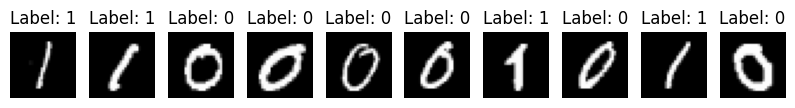

In [ ]:
def plot_digits(images, labels, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_digits(X_train, y_train)


## 🧠 Build and Train a Neural Network

We use `MLPClassifier` from Scikit-learn to build a simple neural network.


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', max_iter=300, random_state=1)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=1)

## 📈 Evaluate the Model


In [ ]:
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Accuracy:", acc)
print("\n🧾 Classification Report:\n", report)
print("\n📊 Confusion Matrix:\n", conf_matrix)


✅ Accuracy: 0.9987821380243572

🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3508
           1       1.00      1.00      1.00      3882

    accuracy                           1.00      7390
   macro avg       1.00      1.00      1.00      7390
weighted avg       1.00      1.00      1.00      7390


📊 Confusion Matrix:
 [[3504    4]
 [   5 3877]]


##NOW I will Test it with my own handwritten DIGIT.##

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving wan.jpg to wan.jpg
Saving sirow.jpg to sirow.jpg


In [ ]:
from PIL import Image, ImageOps
import numpy as np

# Load and preprocess image
image = Image.open('sirow.jpg').convert('L')  # Grayscale
image = ImageOps.invert(image)                     # Invert: black background → white
image = image.resize((28, 28))                     # Resize to 28x28
image = np.array(image) / 255.0                    # Normalize

# Flatten image (like MNIST)
image_flat = image.reshape(1, -1)


In [ ]:
prediction = model.predict(image_flat)
print("Predicted digit:", prediction[0])


Predicted digit: 0


## 📌 Conclusion

This project demonstrated a simple yet powerful application of a neural network for binary classification using handwritten digits 0 and 1. By training on a subset of the MNIST dataset and testing with real-world handwritten images, I was able to reinforce my understanding of:

- Neural network architecture and training using MLPClassifier

- Image preprocessing techniques (grayscale conversion, resizing, normalization)

- Binary classification evaluation (accuracy, confusion matrix, etc.)

**This project was developed as a practical supplement to the lessons from Andrew Ng’s Machine Learning Specialization – Course 2: Advanced Learning Algorithms, particularly focusing on how neural networks learn and generalize.**

**While the scope of this project is intentionally limited to two digits, it lays the groundwork for more complex tasks such as multi-digit classification, image segmentation, and model deployment.**



.

.

.

In [ ]:
import shutil

# Rename the current notebook (default is always '/content/Untitled0.ipynb' or similar)
shutil.copy('Binary Digit Classifier Using Neural Network', '/content/Binary_digit_classify.ipynb')

